In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('/content/kag_risk_factors_cervical_cancer.csv')

In [6]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [9]:
df = df.replace('?', np.nan)

In [11]:
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

In [21]:
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266972909,2.8,0.0,0.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [14]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df = df.apply(pd.to_numeric)
df = df.fillna(df.mean())

In [23]:
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.000000,1.0,37.000000,37.0,1.0,3.0,0.000000,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.000000,0.0,0.000000,0.0,1.0,15.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0000,2.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0000,6.000000,1.0,34.000000,3.4,0.0,0.0,1.000000,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0000,3.000000,0.0,0.000000,0.0,1.0,2.0,1.000000,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0000,5.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0000,2.275561,1.0,1.266973,2.8,0.0,0.0,0.112011,...,0.0,0,0,0,0,0,0,0,0,0


In [83]:
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [96]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [98]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (686, 33)
Test set shape: (172, 33)


In [99]:
model1 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  #'categorical_crossentropy' for multiclass
              metrics=['accuracy'])

In [101]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [102]:
history = model1.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7914 - loss: 0.5727 - val_accuracy: 0.9420 - val_loss: 0.2589
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9344 - loss: 0.3138 - val_accuracy: 0.9420 - val_loss: 0.2305
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9340 - loss: 0.2582 - val_accuracy: 0.9420 - val_loss: 0.2054
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9300 - loss: 0.2561 - val_accuracy: 0.9420 - val_loss: 0.1919
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9315 - loss: 0.2322 - val_accuracy: 0.9420 - val_loss: 0.1764
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9325 - loss: 0.1978 - val_accuracy: 0.9420 - val_loss: 0.1530
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9258 - loss: 0.2008 - val_accuracy: 0.9420 - val_loss: 0.1281
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9510 - loss: 0.1373 - val_accuracy: 0.9420 - v

In [103]:
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9811 - loss: 0.0783 
Test Accuracy: 97.09%


In [104]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary (0 or 1)


print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       161
           1       0.88      0.64      0.74        11

    accuracy                           0.97       172
   macro avg       0.93      0.82      0.86       172
weighted avg       0.97      0.97      0.97       172



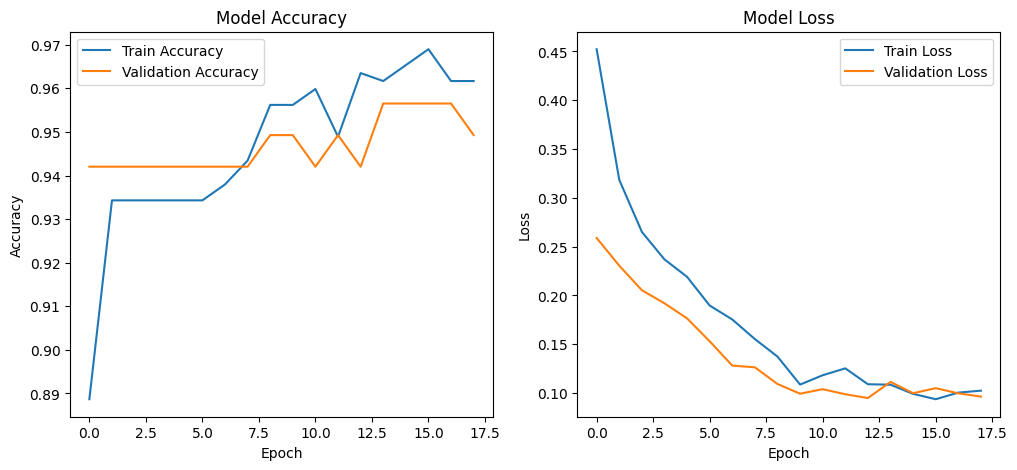

In [105]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()